In [11]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt


try:
# Carica il tuo file XLSX
    xlsx_file = 'C:/Users/loris/Desktop/Python Workspace/FirstTryMiller/dataset/richerDataset.xlsx'  # Sostituisci con il percorso del tuo file

# Leggi i dati dal file XLSX e crea un DataFrame
    df: DataFrame = pd.read_excel(xlsx_file)

# Ora hai un DataFrame con tutti i dati dal tuo file XLSX che puoi utilizzare per l'analisi.
except FileNotFoundError as e:
    print("Il file non è stato trovato.")
# except Exception as e:
    print(f"Si è verificato un errore: {e}")                                                          
    
# Rimuovi il record con k_m2 uguale a 0
df = df[df['k_m2'] != 0]
#Rimuovi colonne Porosity tot e SSA tot
df = df.drop(['Porosity_Tot', 'SSA_Tot'], axis=1)
# Resetta gli indici del DataFrame
df.reset_index(drop=True, inplace=True)


k2_max = df['k_m2'].max()
k2_min = df['k_m2'].min()
print(df)

    Conn.Dens.  Porosity     SSA      Ech  Tortuosity          k_m2
0      310.913     0.137   5.065  -25.849      2.0340  1.473350e-12
1      310.913     0.147   5.253  -31.002      2.6650  2.254724e-12
2      310.913     0.131   4.697  -20.047      2.1090  9.543177e-12
3      350.137     0.115   5.583  -50.613      4.1830  9.664920e-13
4      350.137     0.139   7.447 -136.737      2.5950  9.180783e-13
5      350.137     0.115   5.311  -32.907      4.1010  1.435774e-12
6      368.141     0.134   6.990 -115.218      2.7740  4.010302e-13
7      368.141     0.138   7.132 -110.411      2.7790  3.937021e-12
8      368.141     0.116   5.290  -39.748      3.8680  1.933907e-12
9       10.573     0.020   0.791   -3.948      3.1000  3.021802e-13
10      10.573     0.020   0.806   -2.017      2.9000  3.190436e-13
11     458.436     0.273   7.721 -102.424      1.7170  5.516051e-11
12     458.436     0.250   6.870  -76.478      1.3530  3.822390e-11
13     458.436     0.265   7.560  -95.050      1

In [12]:
try:
# Carica il tuo file XLSX
    xlsx_file = 'C:/Users/loris/Desktop/Python Workspace/FirstTryMiller/dataset/tentativo finale/extra.xlsx'  # Sostituisci con il percorso del tuo file

# Leggi i dati dal file XLSX e crea un DataFrame
    df_extra_training: DataFrame = pd.read_excel(xlsx_file)

# Ora hai un DataFrame con tutti i dati dal tuo file XLSX che puoi utilizzare per l'analisi.
except FileNotFoundError as e:
    print("Il file non è stato trovato.")
# except Exception as e:
    print(f"Si è verificato un errore: {e}")                                                          

df_extra_training.index = df_extra_training.index + len(df)    
# Rimuovi il record con k_m2 uguale a 0
df_extra_training = df_extra_training[df_extra_training['k_m2'] != 0]
#Rimuovi colonne Porosity tot e SSA tot
df_extra_training = df_extra_training.drop(['Porosity_Tot', 'SSA_Tot'], axis=1)


k2_max = df_extra_training['k_m2'].max()
k2_min = df_extra_training['k_m2'].min()
print(df_extra_training)

    Conn.Dens.  Porosity        SSA         Ech  Tortuosity          k_m2
47   28.320000  0.043000   2.511000  -28.011000       3.600  5.500000e-14
48  518.541000  0.237048   6.757200 -127.000000       1.328  3.762810e-11
49  518.541000  0.218960   6.757200 -167.000000       2.408  9.867718e-12
50  518.541000  0.237286   7.320300 -220.000000       2.428  6.567718e-12
51  553.612000  0.294816   6.118200 -127.000000       1.590  3.762810e-11
52  553.612000  0.272320   6.118200 -200.000000       1.900  8.508645e-11
53  553.612000  0.295112   6.628050 -250.000000       1.870  6.782754e-11
54  371.124000  0.234060   5.358000 -127.000000       1.975  1.264402e-11
55  371.124000  0.216200   5.358000 -180.000000       2.473  8.867718e-12
56  371.124000  0.234295   5.804500 -220.000000       1.817  1.508066e-11
57  300.000000  0.129000   1.321734 -216.625000       3.340  8.270667e-13
58  300.000000  0.125000   1.224750 -192.679000       4.349  9.647262e-13
59   28.608500  0.138049   1.385846  -

In [13]:
#Concateno entrambe i dataset per avere subito tutto insieme
df_augmented = pd.concat([df, df_extra_training], ignore_index=True)

df_augmented.values

array([[ 3.10913000e+02,  1.37000000e-01,  5.06500000e+00,
        -2.58490000e+01,  2.03400000e+00,  1.47334950e-12],
       [ 3.10913000e+02,  1.47000000e-01,  5.25300000e+00,
        -3.10020000e+01,  2.66500000e+00,  2.25472410e-12],
       [ 3.10913000e+02,  1.31000000e-01,  4.69700000e+00,
        -2.00470000e+01,  2.10900000e+00,  9.54317700e-12],
       [ 3.50137000e+02,  1.15000000e-01,  5.58300000e+00,
        -5.06130000e+01,  4.18300000e+00,  9.66492000e-13],
       [ 3.50137000e+02,  1.39000000e-01,  7.44700000e+00,
        -1.36737000e+02,  2.59500000e+00,  9.18078300e-13],
       [ 3.50137000e+02,  1.15000000e-01,  5.31100000e+00,
        -3.29070000e+01,  4.10100000e+00,  1.43577360e-12],
       [ 3.68141000e+02,  1.34000000e-01,  6.99000000e+00,
        -1.15218000e+02,  2.77400000e+00,  4.01030190e-13],
       [ 3.68141000e+02,  1.38000000e-01,  7.13200000e+00,
        -1.10411000e+02,  2.77900000e+00,  3.93702120e-12],
       [ 3.68141000e+02,  1.16000000e-01,  5.290

In [14]:
# Calcola le statistiche descrittive per tutto il DataFrame
descriptive_stats = df.describe()

# Stampa le statistiche descrittive
print("Descriptive Statistics:\n", descriptive_stats)

Descriptive Statistics:
        Conn.Dens.   Porosity        SSA         Ech  Tortuosity          k_m2
count   47.000000  47.000000  47.000000   47.000000   47.000000  4.700000e+01
mean   270.504617   0.121851   6.172596 -106.591532    3.170772  8.913665e-12
std    159.433831   0.067019   2.449245   74.449813    0.878953  2.483465e-11
min     10.573000   0.020000   0.791000 -362.849000    1.340000  2.456179e-14
25%    116.198000   0.078000   4.747000 -156.334000    2.776500  3.106119e-13
50%    307.044000   0.115000   5.808000 -110.411000    3.313300  5.462786e-13
75%    359.139000   0.137500   7.687000  -44.292500    3.834000  1.447758e-12
max    607.796000   0.297000  10.300000   -2.017000    4.459000  1.319490e-10


In [15]:
# Controlla i valori mancanti
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values)

# Calcola la matrice di correlazione
correlation_matrix = df.corr()
print("\nCorrelation Matrix:\n", correlation_matrix)


Missing Values:
 Conn.Dens.    0
Porosity      0
SSA           0
Ech           0
Tortuosity    0
k_m2          0
dtype: int64

Correlation Matrix:
             Conn.Dens.  Porosity       SSA       Ech  Tortuosity      k_m2
Conn.Dens.    1.000000  0.864499  0.664176 -0.639080   -0.617447  0.587967
Porosity      0.864499  1.000000  0.632855 -0.523979   -0.697743  0.767341
SSA           0.664176  0.632855  1.000000 -0.754408   -0.229806  0.259044
Ech          -0.639080 -0.523979 -0.754408  1.000000    0.300040 -0.455071
Tortuosity   -0.617447 -0.697743 -0.229806  0.300040    1.000000 -0.634436
k_m2          0.587967  0.767341  0.259044 -0.455071   -0.634436  1.000000


<Figure size 1200x1200 with 0 Axes>

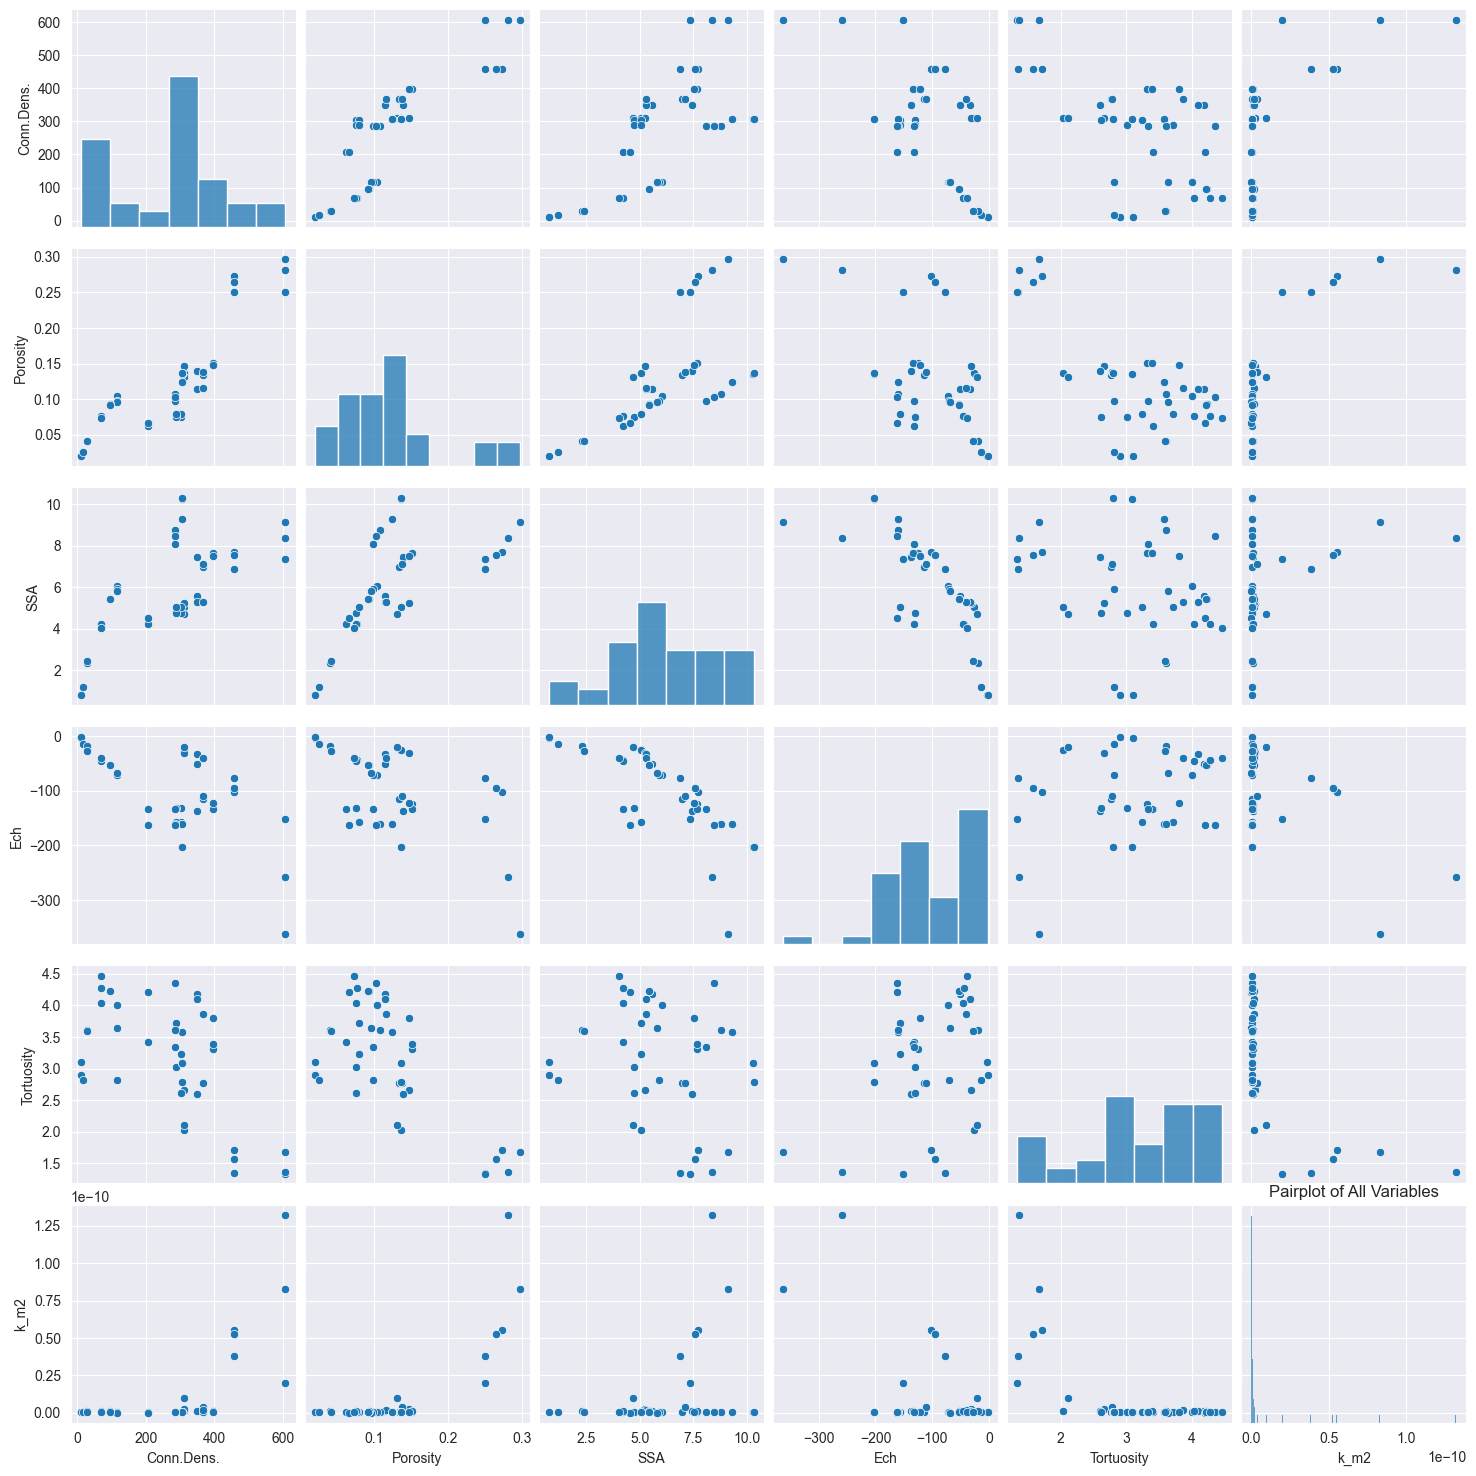

In [16]:
# Pairplot delle variabili
plt.figure(figsize=(12, 12))
sns.pairplot(df)
plt.title('Pairplot of All Variables')
plt.savefig('pairplot_all_variables.png')  # Save the pairplot as an image file
plt.savefig('pairplot_all_variables.pdf', dpi=300)  # Save the pairplot as a PDF file
plt.show()

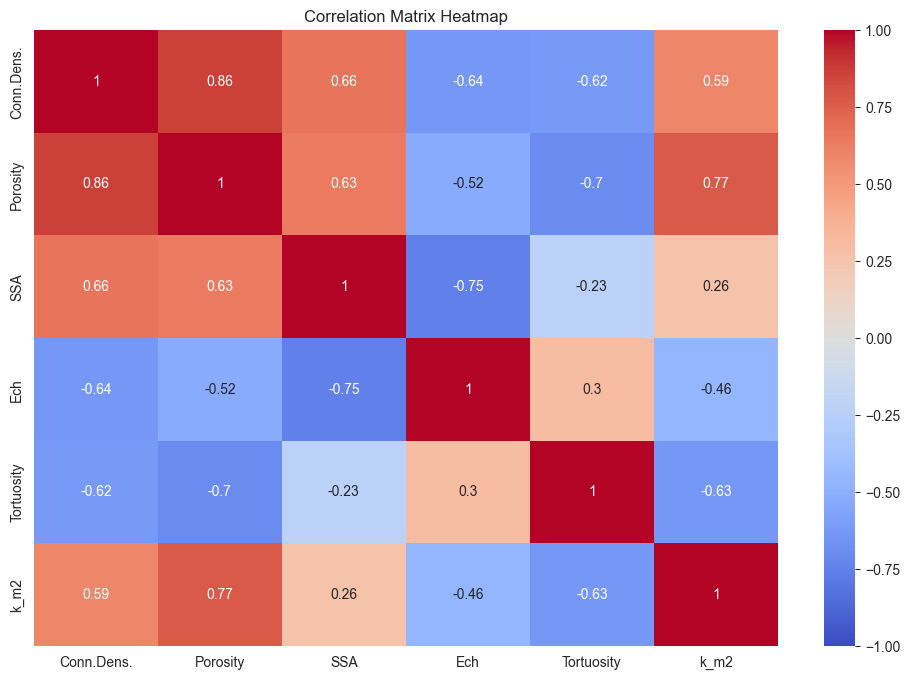

In [17]:
# Heatmap della matrice di correlazione
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [18]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler


# Eseguo lo scaler per tutto il dataset, in modo da effettuare lo scaler omogeneamente su tutti i valori
scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(df_augmented)
# Crea un nuovo DataFrame con i dati scalati e riassegna le colonne non scalate
#df_scaled = pd.DataFrame(scaled_data, columns=columns_to_scale)
df_scaled = pd.DataFrame(scaled_data, columns=df_augmented.columns)

# Stampa il DataFrame scalato
print("DataFrame scalato:")
print(df_scaled)


DataFrame scalato:
    Conn.Dens.  Porosity       SSA       Ech  Tortuosity      k_m2
0     0.502894  0.429197  0.387136  0.933953    0.222573  0.010982
1     0.502894  0.464873  0.404165  0.919672    0.421501  0.016905
2     0.502894  0.407792  0.353803  0.950032    0.246217  0.072152
3     0.568572  0.350712  0.434057  0.865322    0.900063  0.007140
4     0.568572  0.436333  0.602897  0.626641    0.399433  0.006773
..         ...       ...       ...       ...         ...       ...
74    0.117715  0.020661  0.402441  0.831747    0.779319  0.000068
75    0.137703  0.037337  0.444532  0.461755    0.558638  0.001851
76    0.238377  0.092765  0.699844  0.989091    0.590164  0.001477
77    0.129436  0.035485  0.380905  0.870055    0.684741  0.001967
78    0.240157  0.093391  0.646688  0.782380    0.590164  0.001667

[79 rows x 6 columns]


In [19]:
# Questo sarà il dataset che utilizzeremo per la previsione finale (tutto meno che la colonna target)
df_scaled_forLastPrediction=df_scaled.drop(['k_m2'], axis=1)

In [20]:
print(df_scaled_forLastPrediction)

    Conn.Dens.  Porosity       SSA       Ech  Tortuosity
0     0.502894  0.429197  0.387136  0.933953    0.222573
1     0.502894  0.464873  0.404165  0.919672    0.421501
2     0.502894  0.407792  0.353803  0.950032    0.246217
3     0.568572  0.350712  0.434057  0.865322    0.900063
4     0.568572  0.436333  0.602897  0.626641    0.399433
..         ...       ...       ...       ...         ...
74    0.117715  0.020661  0.402441  0.831747    0.779319
75    0.137703  0.037337  0.444532  0.461755    0.558638
76    0.238377  0.092765  0.699844  0.989091    0.590164
77    0.129436  0.035485  0.380905  0.870055    0.684741
78    0.240157  0.093391  0.646688  0.782380    0.590164

[79 rows x 5 columns]


Qui divido i due dataset per mantenere i dataset separati. Vanno ricreate le stesse condizioni per avere lo stesso splitting ed ottenere lo stesso test-set

In [21]:
# Recupera il numero di righe di ciascun DataFrame originale
n_rows_df = len(df)  # Numero di righe del primo DataFrame
n_rows_df_extra = len(df_extra_training)  # Numero di righe del secondo DataFrame

# Dividi il DataFrame scalato in due, usando l'informazione sulla lunghezza originale
df_scaled_part1 = df_scaled.iloc[:n_rows_df, :]  # Dati corrispondenti a df
df_scaled_part2 = df_scaled.iloc[n_rows_df:, :]  # Dati corrispondenti a df_extra_training

# Stampa i DataFrame risuddivisi
print("DataFrame scalato (parte 1 - df):")
print(df_scaled_part1)

print("\nDataFrame scalato (parte 2 - df_extra_training):")
print(df_scaled_part2)

DataFrame scalato (parte 1 - df):
    Conn.Dens.  Porosity       SSA       Ech  Tortuosity      k_m2
0     0.502894  0.429197  0.387136  0.933953    0.222573  0.010982
1     0.502894  0.464873  0.404165  0.919672    0.421501  0.016905
2     0.502894  0.407792  0.353803  0.950032    0.246217  0.072152
3     0.568572  0.350712  0.434057  0.865322    0.900063  0.007140
4     0.568572  0.436333  0.602897  0.626641    0.399433  0.006773
5     0.568572  0.350712  0.409419  0.914392    0.874212  0.010697
6     0.598718  0.418495  0.561502  0.686278    0.455864  0.002854
7     0.598718  0.432765  0.574364  0.699600    0.457440  0.029657
8     0.598718  0.354280  0.407517  0.895433    0.800757  0.014473
9     0.000000  0.011798  0.000000  0.994648    0.558638  0.002104
10    0.000000  0.011798  0.001359  1.000000    0.495586  0.002232
11    0.749909  0.914380  0.627715  0.721735    0.122636  0.417936
12    0.749909  0.832327  0.550632  0.793641    0.007881  0.289555
13    0.749909  0.885839  0.

In [22]:
#Dichiarazione dataset train 'X' e test 'y'
X = df_scaled_part1.drop('k_m2', axis=1)
y = df_scaled_part1['k_m2']
    
X_augmented = df_scaled_part2.drop('k_m2', axis=1)
y_augmented = df_scaled_part2['k_m2']

In [23]:
print(X.shape)
print(y.shape)
print(X_augmented.shape)
print(y_augmented.shape)


(47, 5)
(47,)
(32, 5)
(32,)


Questa fase viene eseguita la PCA analysis

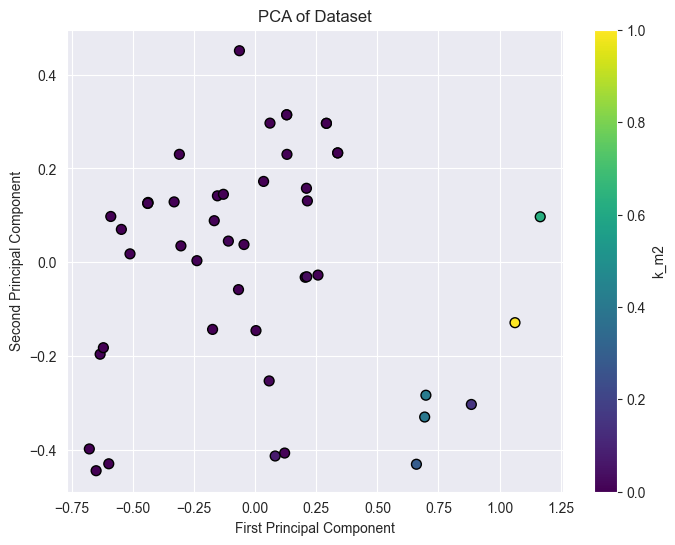

In [10]:
from sklearn.decomposition import PCA

#TODO: qui sarebbe carino vedere la PCA per ogni tipo di roccia

# Inizializzare la PCA e specificare il numero di componenti principali
pca = PCA(n_components=2)

# Adattare la PCA ai dati e trasformarli
X_pca = pca.fit_transform(X)

# Creare un DataFrame con le componenti principali
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=y, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Dataset')
plt.colorbar(label='k_m2')
plt.grid(True)
plt.show()


In [11]:
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by each component: {explained_variance}")
print(f"Total explained variance: {explained_variance.sum()}")


Explained variance by each component: [0.68816193 0.19306658]
Total explained variance: 0.881228514595892


Primo training grezzo per la ricerca del miglior random state

Random state: 0 - R^2 score: 0.9889275303774814 
MAE: 0.007054595860921163 -- MSE: 0.00017109156206295125 
Random state: 1 - R^2 score: 0.05185431460946188 
MAE: 0.009540097558798168 -- MSE: 0.0003983778413335757 
Random state: 2 - R^2 score: -1.0141674034058799 
MAE: 0.14406062926028843 -- MSE: 0.08744562756714949 
Random state: 3 - R^2 score: 0.6263888894060665 
MAE: 0.049743161046182156 -- MSE: 0.014561878646493356 
Random state: 4 - R^2 score: 0.3972555462724998 
MAE: 0.11674219439449618 -- MSE: 0.06815420312737884 
Random state: 5 - R^2 score: 0.013561939417894742 
MAE: 0.010413756678079566 -- MSE: 0.00042145829277639914 
Random state: 6 - R^2 score: -20.550800592026473 
MAE: 0.07437614814087731 -- MSE: 0.04234653866739744 
Random state: 7 - R^2 score: 0.6113617394880541 
MAE: 0.0726070108301245 -- MSE: 0.037066510808727984 
Random state: 8 - R^2 score: 0.5997115173014347 
MAE: 0.045288470369009216 -- MSE: 0.014042145173996472 
Random state: 9 - R^2 score: 0.7006057115718071 
MAE:

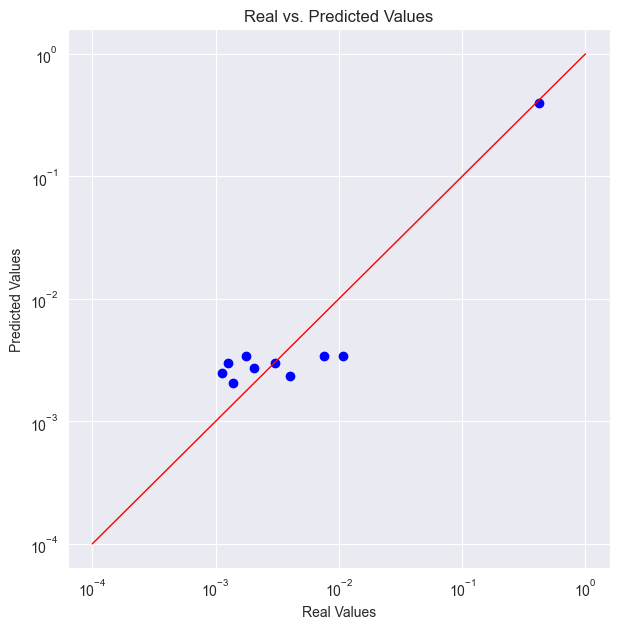

In [24]:
import os
from sklearn.metrics import mean_squared_error, mean_absolute_error


best_y_pred = None
best_y_test = None
best_random_state_split = None
best_score_split = -float('inf')
best_X_test = None
best_X_train = None
best_y_train = None

scores = []
random_states = []
    
for random_state in range(0, 100):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    
    model = XGBRegressor()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)
        
    scores.append(score)
    random_states.append(random_state)

    print(f"Random state: {random_state} - R^2 score: {score} ")
    print(f"MAE: {mean_absolute_error(y_test, y_pred)} -- MSE: {mean_squared_error(y_test, y_pred)} ")
    if score > best_score_split:
        best_score_split = score
        best_random_state_split = random_state
        best_y_test = y_test
        best_y_pred = y_pred
        best_X_test = X_test
        best_X_train = X_train
        best_y_train = y_train

print(f"Best random_state for train_test_split: {best_random_state_split} with R^2 score: {best_score_split}")

relative_path_png = 'C:/Users/loris/Desktop/Python Workspace/FirstTryMiller/pictures_extract/png/'
relative_path_pdf = 'C:/Users/loris/Desktop/Python Workspace/FirstTryMiller/pictures_extract/pdf/'
# Assicurati che la directory esista
os.makedirs(os.path.dirname(relative_path_png), exist_ok=True)
os.makedirs(os.path.dirname(relative_path_pdf), exist_ok=True)

plt.figure(figsize=(7, 7))
plt.scatter(best_y_test, best_y_pred, color='blue')  # Cambia il colore dei punti in blu
plt.plot([10**-4, 10**0], [10**-4, 10**0], 'r-', lw=1)
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Real vs. Predicted Values')
plt.xscale('log', base=10)
plt.yscale('log', base=10)
plt.grid(True)  # Disabilita la griglia

# Salva il grafico come immagine PNG
plt.savefig(f'{relative_path_png}preliminaryTraining.png')  # Salva il grafico come immagine PNG
# Salva il grafico come PDF
plt.savefig(f'{relative_path_pdf}preliminaryTraining.pdf', dpi=300)  # Salva il grafico come PDF

plt.show()

In [25]:
print(best_y_test)
print(best_y_pred)

20    0.001381
41    0.001757
34    0.001132
42    0.007556
26    0.002038
44    0.001272
21    0.004007
27    0.003040
39    0.010879
11    0.417936
Name: k_m2, dtype: float64
[0.00203735 0.00342266 0.00250029 0.0033838  0.00274262 0.00298612
 0.00235377 0.00296821 0.00342266 0.39975727]


In [26]:
print(best_X_train)
print(best_y_train)
print(X_augmented)

    Conn.Dens.  Porosity       SSA       Ech  Tortuosity
13    0.749909  0.885839  0.613132  0.742171    0.077238
1     0.502894  0.464873  0.404165  0.919672    0.421501
31    0.496416  0.382820  0.770016  0.559845    0.711538
12    0.749909  0.832327  0.550632  0.793641    0.007881
6     0.598718  0.418495  0.561502  0.686278    0.455864
30    0.496416  0.429197  0.861320  0.443032    0.462484
36    0.176860  0.290064  0.464854  0.809842    0.469735
32    0.461442  0.290064  0.660233  0.637746    0.634300
18    0.489861  0.222282  0.387136  0.572330    0.602144
16    1.000000  1.000000  0.754708  0.000000    0.109395
2     0.502894  0.407792  0.353803  0.950032    0.246217
45    0.029716  0.086716  0.140308  0.953654    0.717528
33    0.461442  0.325740  0.722280  0.560352    0.719105
43    0.097330  0.200876  0.293840  0.896736    0.987074
29    0.496416  0.425630  0.858331  0.445617    0.554540
24    0.647493  0.479143  0.621556  0.637042    0.650063
37    0.176860  0.282929  0.454

Ora riunisco l'attuale TRAINING set + il dataset extra (che andrà a rafforzare l'allenamento)

In [27]:
#Unisco i set di train, dei due dataset. Solo una volta che il primo set di train 

df_augmented_X = pd.concat([best_X_train, X_augmented], ignore_index=True)
df_augmented_y = pd.concat([best_y_train, y_augmented], ignore_index=True)

#Print
df_augmented_X

,Conn.Dens.,Porosity,SSA,Ech,Tortuosity
0,0.749909,0.885839,0.613132,0.742171,0.077238
1,0.502894,0.464873,0.404165,0.919672,0.421501
2,0.496416,0.382820,0.770016,0.559845,0.711538
3,0.749909,0.832327,0.550632,0.793641,0.007881
4,0.598718,0.418495,0.561502,0.686278,0.455864
...,...,...,...,...,...
64,0.117715,0.020661,0.402441,0.831747,0.779319
65,0.137703,0.037337,0.444532,0.461755,0.558638
66,0.238377,0.092765,0.699844,0.989091,0.590164
67,0.129436,0.035485,0.380905,0.870055,0.684741


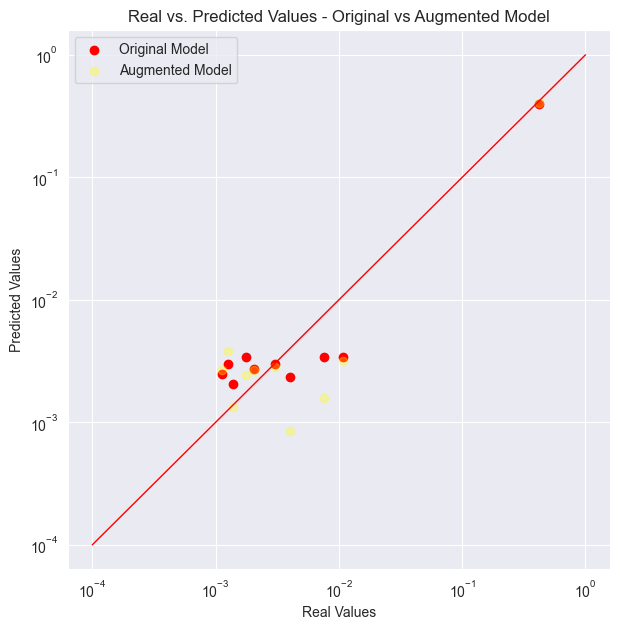

R^2 score: 0.997342781327955 

MSE: 4.106553854520729e-05
MAE: 0.003971909327311918


In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

model = XGBRegressor()      # Creo un altro modello, ma sovrascrivo tranquillamente quello precedente
model.fit(df_augmented_X, df_augmented_y)

y_pred_SecondModel = model.predict(best_X_test)
score = r2_score(best_y_test, y_pred_SecondModel)
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Visualizzare la differenza tra i due modelli (opzionale ma utile)
plt.figure(figsize=(7, 7))
plt.scatter(best_y_test, best_y_pred, color='red', label='Original Model')  # Modello originale
plt.scatter(best_y_test, y_pred_SecondModel, color='yellow', label='Augmented Model', alpha=0.3)  # Modello con dati extra
plt.plot([10 ** -4, 10 ** 0], [10 ** -4, 10 ** 0], 'r-', lw=1)
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Real vs. Predicted Values - Original vs Augmented Model')
plt.xscale('log', base=10)
plt.yscale('log', base=10)
plt.grid(True)
plt.legend()
plt.show()

print(f"R^2 score: {score} \n")
print(f"MSE: {mean_squared_error(best_y_test, y_pred_SecondModel)}")
print(F"MAE: {mean_absolute_error(best_y_test, y_pred_SecondModel)}")


Hyperparameter tuning

Fitting 7 folds for each of 5832 candidates, totalling 40824 fits
Best parameters found: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 50, 'reg_alpha': 0, 'reg_lambda': 2, 'subsample': 0.8}
R^2 score: 0.9862640914361626
MSE: 0.0002122792860504696
MAE: 0.007057937495198169
Grafico dell'allenamento effettuato


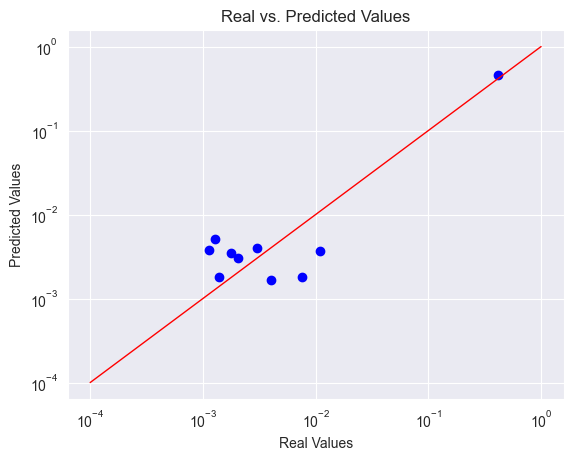

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV, LeaveOneOut
from tqdm import tqdm
import joblib

param_grid = {
    'n_estimators': [50, 100, 200],              # Numero di alberi
    'learning_rate': [0.001, 0.01, 0.1],     # Velocità di apprendimento
    'max_depth': [5, 7, 10],                  # Profondità massima di ogni albero
    'min_child_weight': [1, 3],               # Peso minimo per i campioni foglia
    'subsample': [0.6, 0.8, 1.0],                # Percentuale di campioni per albero
    'colsample_bytree': [0.6, 0.8, 1.0],         # Percentuale di caratteristiche da campionare per albero
    'gamma': [0, 0.1, 0.3],                 # Regularizzazione
    'reg_alpha': [0, 0.1],                    # L1 regularizzazione
    'reg_lambda': [1, 2],                   # L2 regularizzazione
}


best_r2=None


with joblib.parallel_backend('loky', inner_max_num_threads=1):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=7, n_jobs=-1, verbose=2)
    grid_search.fit(df_augmented_X, df_augmented_y)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(best_X_test)
r2 = r2_score(best_y_test, y_pred)
print(f"Best parameters found: {grid_search.best_params_}")
print(f"R^2 score: {r2}")
print(f"MSE: {mean_squared_error(best_y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(best_y_test, y_pred)}")

print("Grafico dell'allenamento effettuato\n\n")
plt.scatter(best_y_test, y_pred, color='blue')  # Cambia il colore dei punti in blu
plt.plot([10**-4, 10**0], [10**-4, 10**0], 'r-', lw=1)
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Real vs. Predicted Values')
plt.xscale('log', base=10)
plt.yscale('log', base=10)
plt.grid(True)  # Disabilita la griglia
plt.show()

# if(r2>best_r2):
#     best_r2=r2
#     best_model=best_model
#     best_y_pred=y_pred
#     best_Y_test=best_y_test
#     best_cv=cv


# relative_path_png = 'C:/Users/loris/Desktop/Python Workspace/FirstTryMiller/pictures_extract/png/'
# relative_path_pdf = 'C:/Users/loris/Desktop/Python Workspace/FirstTryMiller/pictures_extract/pdf/'
# # Assicurati che la directory esista
# os.makedirs(os.path.dirname(relative_path_png), exist_ok=True)
# os.makedirs(os.path.dirname(relative_path_pdf), exist_ok=True)

# # Salva il grafico come immagine PNG
# plt.savefig(f'{relative_path_png}hyperParam_tuning.png')  # Salva il grafico come immagine PNG
# # Salva il grafico come PDF
# plt.savefig(f'{relative_path_pdf}hyperParam_tuning.pdf', dpi=300)  # Salva il grafico come PDF

plt.show()

In [31]:
# Crea un DataFrame con i valori reali e predetti
results_df = pd.DataFrame({
    'Valori Reali': best_y_test,
    'Valori Predetti': y_pred       #Valori predetti con modello aggiornato
})

# Stampa il DataFrame
print("\nValori Reali vs Valori Predetti:\n")
print(results_df)


Valori Reali vs Valori Predetti:

    Valori Reali  Valori Predetti
20      0.001381         0.001819
41      0.001757         0.003491
34      0.001132         0.003761
42      0.007556         0.001799
26      0.002038         0.003023
44      0.001272         0.005065
21      0.004007         0.001667
27      0.003040         0.003991
39      0.010879         0.003720
11      0.417936         0.462731


In [32]:
# Crea un DataFrame con i valori reali e predetti
results_df = pd.DataFrame({
    'Valori Reali': best_y_test,
    'Valori Predetti': best_y_pred       #valori predetti con modello preliminare (obsoleto)
})

# Stampa il DataFrame
print("\nValori Reali vs Valori Predetti:\n")
print(results_df)


Valori Reali vs Valori Predetti:

    Valori Reali  Valori Predetti
20      0.001381         0.002037
41      0.001757         0.003423
34      0.001132         0.002500
42      0.007556         0.003384
26      0.002038         0.002743
44      0.001272         0.002986
21      0.004007         0.002354
27      0.003040         0.002968
39      0.010879         0.003423
11      0.417936         0.399757


In [33]:
# Calcola le statistiche descrittive per tutto il DataFrame
descriptive_stats = df_scaled.describe()

# Stampa le statistiche descrittive
print("Descriptive Statistics:\n", descriptive_stats)

Descriptive Statistics:
        Conn.Dens.   Porosity        SSA        Ech  Tortuosity       k_m2
count   79.000000  79.000000  79.000000  79.000000   79.000000  79.000000
mean     0.392498   0.393084   0.452699   0.686632    0.567874   0.068294
std      0.292614   0.271323   0.246671   0.209746    0.275792   0.173688
min      0.000000   0.000000   0.000000   0.000000    0.000000   0.000000
25%      0.117715   0.208011   0.310687   0.524757    0.414565   0.001804
50%      0.461442   0.382820   0.421375   0.668411    0.590164   0.004007
75%      0.598718   0.466656   0.617299   0.875461    0.767103   0.013567
max      1.000000   1.000000   1.000000   1.000000    1.000000   1.000000


Valutazione del modello
- QQ plot
- Residual plot
- Feature importance
- Bias-Variance Tradeoff 

   Theoretical Quantiles  Ordered Values (Residuals)
0              -1.498767                   -0.044795
1              -0.984947                   -0.003793
2              -0.647038                   -0.002629
3              -0.371098                   -0.001733
4              -0.121214                   -0.000986
5               0.121214                   -0.000951
6               0.371098                   -0.000438
7               0.647038                    0.002340
8               0.984947                    0.005756
9               1.498767                    0.007159


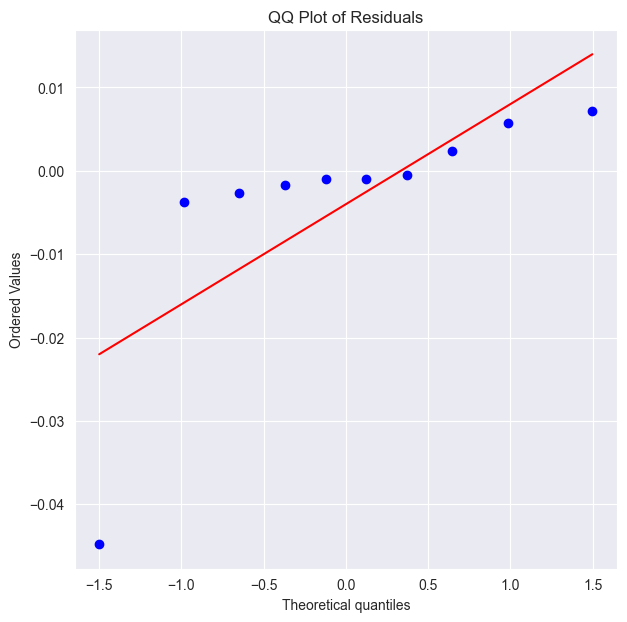

In [37]:
##  - QQ PLOT -
import scipy.stats as stats

# Verifica che le lunghezze di best_y_test e best_y_pred siano uguali
if len(best_y_test) != len(y_pred):
    raise ValueError("Le lunghezze di best_y_test e best_y_pred non sono uguali!")

# Calcola i residui
residuals = best_y_test - y_pred

# Genera i valori per il QQ plot senza disegnarlo
(theoretical_quantiles, ordered_values), (slope, intercept, r) = stats.probplot(residuals, dist="norm")

# Crea un DataFrame per visualizzare i valori in due colonne
df_qq = pd.DataFrame({
    'Theoretical Quantiles': theoretical_quantiles,
    'Ordered Values (Residuals)': ordered_values
})
# Stampa il DataFrame
print(df_qq)

plt.figure(figsize=(7, 7))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot of Residuals')
plt.grid(True)

# # Salva il grafico come immagine PNG
# plt.savefig(f'{relative_path_png}qq.png')  # Salva il grafico come immagine PNG
# # Salva il grafico come PDF
# plt.savefig(f'{relative_path_pdf}qq.pdf', dpi=300)  # Salva il grafico come PDF

plt.show()

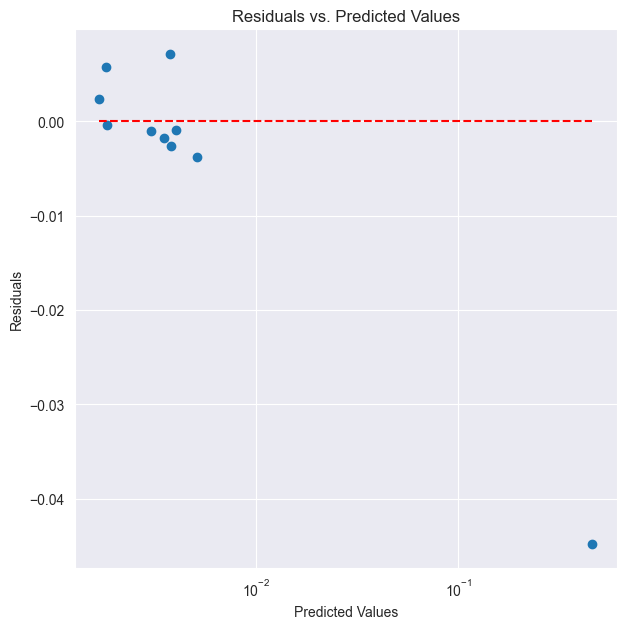

In [38]:
# Residual plot
plt.figure(figsize=(7, 7))
plt.scatter(y_pred, residuals)
plt.hlines(0, min(y_pred), max(y_pred), colors='r', linestyles='dashed')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.xscale('log', base=10)
plt.title('Residuals vs. Predicted Values')
plt.grid(True)


# Salva il grafico come immagine PNG
plt.savefig(f'{relative_path_png}final_train.png')  # Salva il grafico come immagine PNG
# Salva il grafico come PDF
plt.savefig(f'{relative_path_pdf}final_train.pdf', dpi=300)  # Salva il grafico come PDF
plt.show()

      Feature  Importance
0  Conn.Dens.    0.020792
1    Porosity    0.763816
2         SSA    0.002900
3         Ech    0.105331
4  Tortuosity    0.107162


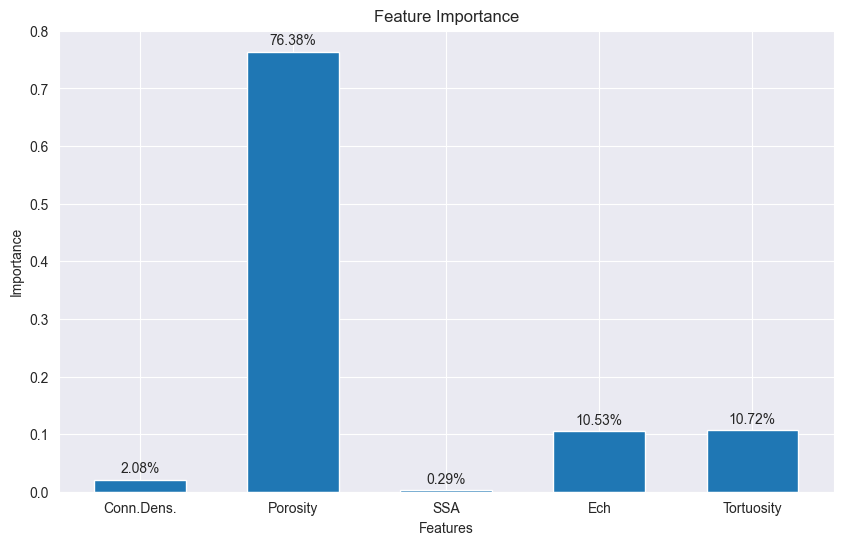

In [41]:
#TODO: PARLARE CON DANICA
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

# Crea un DataFrame per visualizzare i valori in modo chiaro
df_feature_importance = pd.DataFrame({
    'Feature': df_augmented_X.columns,
    'Importance': best_model.feature_importances_
})

# Stampa il DataFrame
print(df_feature_importance)

# Example code to plot feature importance with values annotated on each bar
plt.figure(figsize=(10, 6))

# Adjust the width of the bars
bar_width = 0.6  # Reduce this value to make the bars narrower

# Plot the bars with the specified width
bars = plt.bar(range(len(best_model.feature_importances_)), best_model.feature_importances_, width=bar_width)
plt.xticks(range(len(best_model.feature_importances_)), df_augmented_X.columns, rotation=0)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.grid(True)

# Annotate the bars with the importance values as percentages
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2%}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')


# Salva il grafico come immagine PNG
plt.savefig(f'{relative_path_png}feature_importance.png')  # Salva il grafico come immagine PNG
# Salva il grafico come PDF
plt.savefig(f'{relative_path_pdf}feature_importance.pdf', dpi=300)  # Salva il grafico come PDF
plt.show()

Questo è il corretto modello di Bias-Variance Tradeoff

C:\Users\loris\Desktop\Python Workspace\FirstTryMiller\venv\Lib\site-packages\sklearn\model_selection\_validation.py:1776: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 61 instead of 69.
  warnings.warn(


Training Scores:
    Training examples       MSE
0                   6  0.011760
1                   7  0.007369
2                   8  0.005398
3                   9  0.004844
4                  10  0.005790
..                ...       ...
56                 62  0.002220
57                 63  0.002187
58                 64  0.002167
59                 65  0.002126
60                 66  0.002089

[61 rows x 2 columns]

Cross-validation Scores:
    Training examples       MSE
0                   6  0.022932
1                   7  0.020987
2                   8  0.021524
3                   9  0.021417
4                  10  0.016176
..                ...       ...
56                 62  0.009455
57                 63  0.009328
58                 64  0.009509
59                 65  0.009332
60                 66  0.009447

[61 rows x 2 columns]


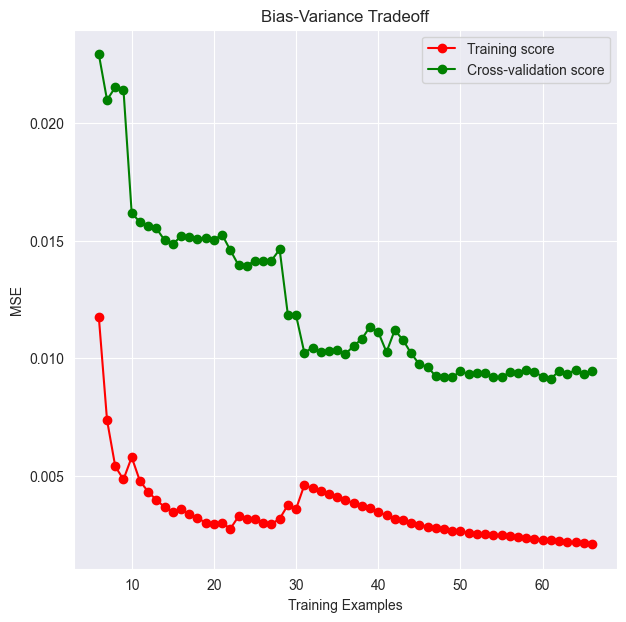

In [46]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error

loo = LeaveOneOut()
# Bias-Variance plot with MSE
train_sizes, train_scores, test_scores = learning_curve(
    best_model, df_augmented_X, df_augmented_y, cv=33, scoring='neg_mean_squared_error', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, len(df_augmented_X))
)

train_scores_mean = -np.mean(train_scores, axis=1)  # Invert sign for positive MSE
test_scores_mean = -np.mean(test_scores, axis=1)

# Crea due DataFrame separati per visualizzare i punteggi di Training e di Cross-validation
df_train_scores = pd.DataFrame({
    'Training examples': train_sizes,
    'MSE': train_scores_mean
})
df_test_scores = pd.DataFrame({
    'Training examples': train_sizes,
    'MSE': test_scores_mean
})
# Stampa i DataFrame per visualizzare i dati
print("Training Scores:")
print(df_train_scores)
print("\nCross-validation Scores:")
print(df_test_scores)

plt.figure(figsize=(7, 7))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.xlabel('Training Examples')
plt.ylabel('MSE')
# plt.yscale('log', base=10)
plt.title('Bias-Variance Tradeoff')
plt.legend(loc='best')
plt.grid(True)

# Salva il grafico come immagine PNG
plt.savefig(f'{relative_path_png}feature_importance.png')  # Salva il grafico come immagine PNG
# Salva il grafico come PDF
plt.savefig(f'{relative_path_pdf}feature_importance.pdf', dpi=300)  # Salva il grafico come PDF

plt.show()


Qui proviamo a prevedere tutta la colonna "k_m2_predicted" ed estrapoliamo il csv


In [47]:

# il modello adesso prevede k_m2 per ogni record
y_pred_tot = best_model.predict(df_scaled_forLastPrediction)

# Aggiungo la colonna delle predizioni al dataset
df_scaled_forLastPrediction['k_m2_predetto'] = y_pred_tot

# Visualizza il dataset con la nuova colonna
print(df_scaled_forLastPrediction)


    Conn.Dens.  Porosity       SSA       Ech  Tortuosity  k_m2_predetto
0     0.502894  0.429197  0.387136  0.933953    0.222573       0.041248
1     0.502894  0.464873  0.404165  0.919672    0.421501       0.015844
2     0.502894  0.407792  0.353803  0.950032    0.246217       0.059755
3     0.568572  0.350712  0.434057  0.865322    0.900063       0.008561
4     0.568572  0.436333  0.602897  0.626641    0.399433       0.007525
..         ...       ...       ...       ...         ...            ...
74    0.117715  0.020661  0.402441  0.831747    0.779319       0.001343
75    0.137703  0.037337  0.444532  0.461755    0.558638       0.001160
76    0.238377  0.092765  0.699844  0.989091    0.590164       0.005463
77    0.129436  0.035485  0.380905  0.870055    0.684741       0.001446
78    0.240157  0.093391  0.646688  0.782380    0.590164       0.002304

[79 rows x 6 columns]



Denormalizzazione di tutto il dataset di training prima dell'export


In [52]:
#Denormalizzo tutto
df_denormalizzato = scaler.inverse_transform(df_scaled_forLastPrediction)

# Converti di nuovo in DataFrame
df_denormalizzato = pd.DataFrame(df_denormalizzato, columns=df_scaled_forLastPrediction.columns)

# Visualizza il dataset denormalizzato
print(df_denormalizzato)

    Conn.Dens.  Porosity       SSA         Ech  Tortuosity  k_m2_predetto
0     310.9130  0.137000  5.065000  -25.849000       2.034   5.466165e-12
1     310.9130  0.147000  5.253000  -31.002000       2.665   2.114770e-12
2     310.9130  0.131000  4.697000  -20.047000       2.109   7.907683e-12
3     350.1370  0.115000  5.583000  -50.613000       4.183   1.153906e-12
4     350.1370  0.139000  7.447000 -136.737000       2.595   1.017242e-12
..         ...       ...       ...         ...         ...            ...
74     80.8750  0.022484  5.233959  -62.728037       3.800   2.016714e-13
75     92.8125  0.027159  5.698655 -196.233125       3.100   1.776038e-13
76    152.9375  0.042696  8.517298   -5.953272       3.200   7.453116e-13
77     87.8750  0.026640  4.996205  -48.905390       3.500   2.153683e-13
78    154.0000  0.042871  7.930462  -80.541369       3.200   3.284715e-13

[79 rows x 6 columns]


In [30]:
df_denormalizzato.to_csv('dataset_con_predizioni.csv', index=False)

NameError: name 'df_denormalizzato' is not defined


Procedo a salvare il modello


In [50]:
import pickle

# Percorso completo con nome del file
save_path = 'C:/Users/loris/Desktop/Python Workspace/FirstTryMiller/modello_addestrato.pkl'

# Salva il modello su disco
with open(save_path, 'wb') as file:
    pickle.dump(best_model, file)




Import del modello per utilizzarlo in futuro

In [56]:
# Carica il modello dal file
with open('modello_addestrato.pkl', 'rb') as file:
    best_model_caricato = pickle.load(file)

# Usa il modello caricato per fare nuove predizioni
# Inserire il dataset da predirre al posto di 'nuovi_dati_??' --- verificare formato corretto delle colonne
nuove_predizioni = best_model_caricato.predict(nuovi_dati_??)


SyntaxError: invalid syntax (4092669340.py, line 7)




Code to be lefted here. Logiche che possono servire in futuro

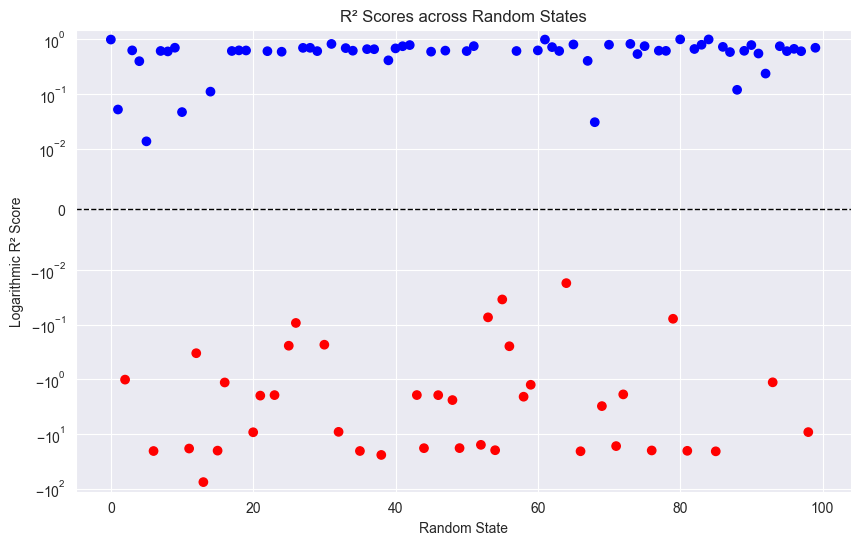

In [54]:
#Qui viene plottato l'R2 di ogni random state e viene visualizzato il valore di ognuno, per evidenziare quanti < 0 e quanti 0 > x > 1

# Scatter plot con scala simmetrica logaritmica
plt.figure(figsize=(10, 6))
plt.scatter(random_states, scores, color=['red' if s < 0 else 'blue' for s in scores])  # Rosso per R² negativi, blu per positivi
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Linea di riferimento a R² = 0
plt.xlabel('Random State')

plt.ylabel('Logarithmic R² Score')
plt.ylim(min(scores) * 1.5, max(scores) * 1.5)  # Espandi i limiti dell'asse Y

plt.yscale('symlog', base=10, linthresh=0.01)  # Imposta la scala logaritmica simmetrica, con scala lineare per valori vicino a zero
plt.title('R² Scores across Random States')
plt.grid(True)
plt.show()